In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('white')
%matplotlib inline

In [118]:
data_scientist_trends = pd.read_csv('./Scraped Data/Data Scientist 2020-05-31.csv', encoding='UTF-8')

In [119]:
data_scientist_trends = data_scientist_trends.drop(columns=['Full_Description'])

In [120]:
data_scientist_trends.head()

,Primary_Key,Title,Company,Location,Salary,Ratings,Remote_work,Date_posted
0,94f3279c66a2af26,Principal PK/PD Statistical Programmer,Prescribe Data,"Toronto, ON",None,None,Remote work available,Just posted
1,7292631b85b6c5f3,Senior Data Scientist,Tonal,"Toronto, ON",None,None,None,1 day ago
2,9dc10ad7bd2ba391,Applied Scientist,Cyclica,"Toronto, ON",None,None,None,2 days ago
3,7c88fbde01e34960,Product Manager – Enterprise Data and Analytics,Real Matters,"Toronto, ON",None,2,Remote work available,2 days ago
4,d4953b2cd0f46973,"Senior Data Analyst, Investigations",Investment Industry Reg Org of Canada,"Toronto, ON",None,None,None,2 days ago


In [121]:
data_scientist_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 8 columns):
Primary_Key    2676 non-null object
Title          2676 non-null object
Company        2676 non-null object
Location       2676 non-null object
Salary         2676 non-null object
Ratings        2676 non-null object
Remote_work    2676 non-null object
Date_posted    2676 non-null object
dtypes: object(8)
memory usage: 167.4+ KB


In [122]:
data_scientist_trends.describe(include='all')

,Primary_Key,Title,Company,Location,Salary,Ratings,Remote_work,Date_posted
count,2676,2676,2676,2676,2676,2676,2676,2676
unique,2676,1764,1289,423,118,31,2,31
top,ee64debe59e50c84,Data Scientist,Amazon.com Services LLC,"Seattle, WA",None,None,None,30+ days ago
freq,1,269,200,277,2542,751,2496,1791


In [123]:
data_scientist_trends.dtypes

Primary_Key    object
Title          object
Company        object
Location       object
Salary         object
Ratings        object
Remote_work    object
Date_posted    object
dtype: object

In [124]:
ratings_df = data_scientist_trends[['Ratings']] 

In [125]:
ratings_df.head()

,Ratings
0,None
1,None
2,None
3,2
4,None


In [126]:
Ratings_count = ratings_df.Ratings.value_counts()
print(Ratings_count[Ratings_count>1])

None    751
3.6     361
4       237
3.8     213
4.2     204
3.9     164
4.1     135
3.7      95
4.3      79
3.5      77
3.4      67
3.3      42
4.4      33
4.5      27
3.2      24
5        24
3        23
4.8      18
2.7      17
2.8      17
3.1      15
4.7      13
2.9      10
4.6      10
2         6
2.2       5
2.6       4
2.5       2
Name: Ratings, dtype: int64


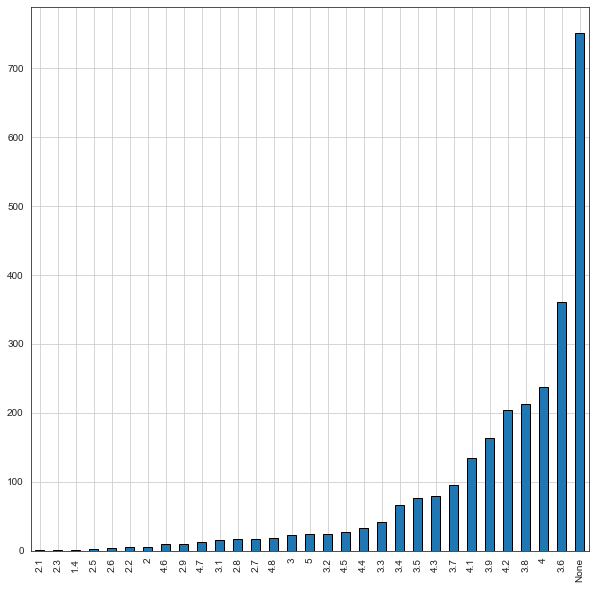

In [127]:
plt.rcParams['figure.figsize'] = [10, 10]
ratings_df.Ratings.value_counts().sort_values().plot(kind = 'bar',edgecolor='black',
                                                     linewidth='1', grid=True, x = 'Count', y = 'Ratings')

In [128]:
Ratings_count.describe(include='all')

count     31.000000
mean      86.322581
std      151.010460
min        1.000000
25%       10.000000
50%       24.000000
75%       87.000000
max      751.000000
Name: Ratings, dtype: float64

In [129]:
ratings_df = ratings_df[ratings_df.Ratings != 'None']

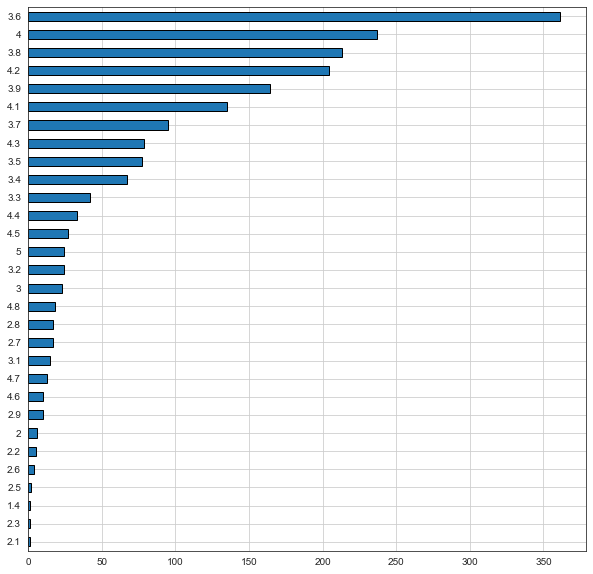

In [130]:
plt.rcParams['figure.figsize'] = [10, 10]
ratings_df.Ratings.value_counts().sort_values().plot(kind = 'barh',edgecolor='black',
                                                     linewidth='1', grid=True, x = 'Count', y = 'Ratings')

In [131]:
ratings_df['Ratings'].dtypes

dtype('O')

In [132]:
ratings_df['Ratings'] = ratings_df['Ratings'].astype(float)
ratings_df['Ratings'].dtypes

dtype('float64')

In [133]:
ratings_df['Mod'] = ratings_df.Ratings % 0.5

In [134]:
ratings_df.Mod.dtypes

dtype('float64')

In [135]:
ratings_df.head()

,Ratings,Mod
3,2.0,0.0
5,2.2,0.2
8,3.9,0.4
9,3.9,0.4
10,3.9,0.4


In [136]:
ratings_df.Mod.unique()

array([0. , 0.2, 0.4, 0.3, 0.1, 0.1, 0.4])

In [137]:
ratings_df['Mod'] = np.where(ratings_df.Mod < 0.3, ratings_df.Mod * -1 , ratings_df.Mod)

In [138]:
ratings_df.Mod.unique()

array([-0. , -0.2,  0.4, -0.3, -0.1, -0.1,  0.4])

In [139]:
ratings_df['Mod'] = np.where(ratings_df.Mod > 0.3, 0.1 , ratings_df.Mod)

In [140]:
ratings_df.Mod.unique()

array([-0. , -0.2,  0.1, -0.3, -0.1, -0.1])

In [141]:
ratings_df['Mod'] = np.where(ratings_df.Mod < -0.25, 0.2 , ratings_df.Mod)

In [142]:
ratings_df.Mod.unique()

array([-0. , -0.2,  0.1,  0.2, -0.1, -0.1])

In [143]:
ratings_df.head()

,Ratings,Mod
3,2.0,-0.0
5,2.2,-0.2
8,3.9,0.1
9,3.9,0.1
10,3.9,0.1


In [144]:
ratings_df['New'] = ratings_df['Ratings'] + ratings_df['Mod']

In [145]:
ratings_df

,Ratings,Mod,New
3,2.0,-0.0,2.0
5,2.2,-0.2,2.0
8,3.9,0.1,4.0
9,3.9,0.1,4.0
10,3.9,0.1,4.0
...,...,...,...
2670,3.7,-0.2,3.5
2671,4.2,-0.2,4.0
2672,4.0,-0.0,4.0
2674,4.2,-0.2,4.0


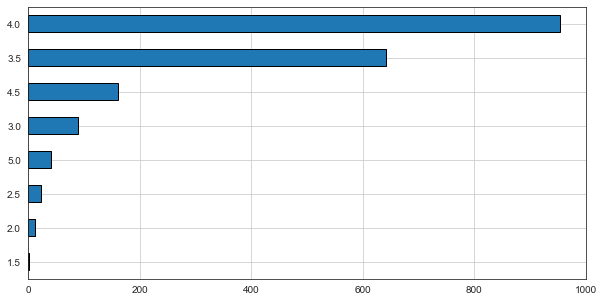

In [146]:
plt.rcParams['figure.figsize'] = [10, 5]
ratings_df.New.value_counts().sort_values().plot(kind = 'barh',edgecolor='black',
                                                     linewidth='1', grid=True, x = 'Count', y = 'Ratings')

In [147]:
data_scientist_trends.Location.describe(include='all')

count            2676
unique            423
top       Seattle, WA
freq              277
Name: Location, dtype: object

In [148]:
data_scientist_trends['Location'] = data_scientist_trends['Location'].str.split('|').str[0]
data_scientist_trends['Location'] = data_scientist_trends['Location'].str.strip()

In [149]:
data_scientist_trends.Location.describe()

count            2676
unique            338
top       Seattle, WA
freq              278
Name: Location, dtype: object

In [150]:
data_scientist_trends.Location.head()

0    Toronto, ON
1    Toronto, ON
2    Toronto, ON
3    Toronto, ON
4    Toronto, ON
Name: Location, dtype: object

In [151]:
Location_count = data_scientist_trends.Location.value_counts()
print(Location_count[Location_count>10])

Seattle, WA                      278
New York, NY                     214
San Francisco, CA                186
Washington, DC                    97
Toronto, ON                       91
Montréal, QC                      72
Austin, TX                        65
Los Angeles, CA                   50
McLean, VA                        43
San Francisco, CA 94103           43
Redmond, WA                       42
Vancouver, BC                     39
Arlington, VA                     31
McLean, VA 22102                  30
Herndon, VA                       28
San Francisco, CA 94105           28
Washington, DC 20006              27
New York, NY 10011                23
Gaithersburg, MD 20878            22
Springfield, VA                   21
Redwood City, CA                  21
Arlington, VA 22202               21
San Mateo, CA                     20
Ottawa, ON                        19
New York, NY 10017                19
Alexandria, VA                    18
San Francisco, CA 94104           18
S

In [152]:
data_scientist_trends['City'] = data_scientist_trends['Location'].str.split(',').str[0]
data_scientist_trends['State'] = data_scientist_trends['Location'].str.split(',').str[1:]
data_scientist_trends['State'] = [' '.join(map(str, l)) for l in data_scientist_trends['State']]
data_scientist_trends['State'] = data_scientist_trends['State'].str.strip()
data_scientist_trends['State'] = data_scientist_trends['State'].str.split(' ').str[0]

In [153]:
data_scientist_trends['State'].describe()

count     2676
unique      12
top         CA
freq       670
Name: State, dtype: object

In [154]:
data_scientist_trends['City'].describe()

count         2676
unique         130
top       New York
freq           389
Name: City, dtype: object

In [155]:
State_count = data_scientist_trends.State.value_counts()
print(State_count[State_count>10])

CA    670
WA    437
NY    417
VA    393
MD    184
DC    173
ON    133
TX    111
QC     83
BC     41
OR     19
AB     15
Name: State, dtype: int64


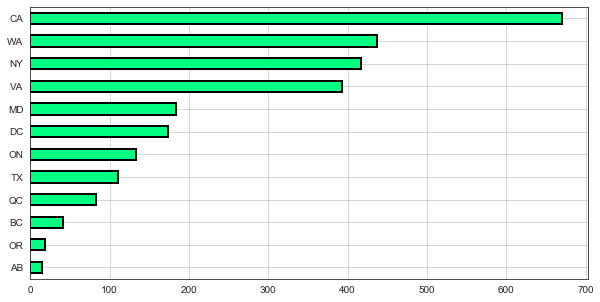

In [156]:
#Number of Data Scientist jobs in each state
data_scientist_trends.State.value_counts().sort_values().plot(kind = 'barh',edgecolor='black',
                                                     linewidth='2', grid=True,colormap ='winter_r')

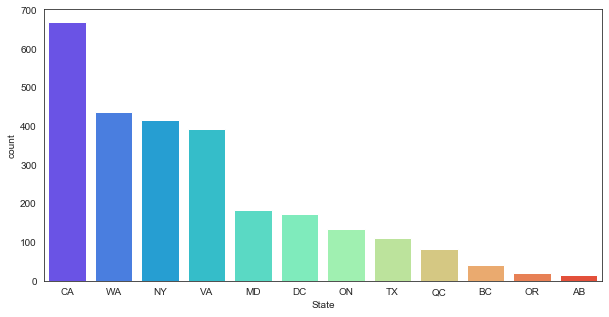

In [157]:
sns.countplot(x='State',data=data_scientist_trends,palette='rainbow', 
              order = data_scientist_trends.State.value_counts().index)

In [158]:
title_df = data_scientist_trends[['Title']] 

In [159]:
title_df.describe()

,Title
count,2676
unique,1764
top,Data Scientist
freq,269


In [160]:
title_df.head()

,Title
0,Principal PK/PD Statistical Programmer
1,Senior Data Scientist
2,Applied Scientist
3,Product Manager – Enterprise Data and Analytics
4,"Senior Data Analyst, Investigations"


In [161]:
# Does not contain "Data"
title_df[~title_df.Title.str.contains("Data")]

,Title
0,Principal PK/PD Statistical Programmer
2,Applied Scientist
6,Machine Learning Engineer
7,Senior Back End Developer/Machine Learning Eng...
10,"Manager, Pricing, Analytics and Reporting"
...,...
2667,"Applied Scientist, Alexa Speech"
2668,"Sr. Manager, Selling Partner Analytics"
2670,Software Engineer: Machine Learning / Signal P...
2671,Apple Media Products Engineering - Machine Lea...


In [162]:
# title_df = title_df[title_df.Title.str.contains("Scientist")|title_df.Title.str.contains("Data")]
data_scientist = title_df[title_df.Title.str.contains("Data Scientist")]

In [163]:
data_scientist.describe()

,Title
count,950
unique,460
top,Data Scientist
freq,269


In [164]:
#Fic this error/warning
data_scientist['Title'] = data_scientist['Title'].str.split(' ')

C:\Users\aujla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [167]:
data_scientist['Lenght'] = data_scientist['Title'].apply(len)

C:\Users\aujla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [168]:
data_scientist.head()

,Title,Lenght
1,"[Senior, Data, Scientist]",3
11,"[Senior, Data, Scientist]",3
13,"[Data, Scientist, III]",3
14,"[Data, Scientist]",2
15,"[Data, Scientist]",2


In [169]:
# expand list column into multiple columns
data_scientist['Title'].apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,Senior,Data,Scientist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Senior,Data,Scientist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Data,Scientist,III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Data,Scientist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Data,Scientist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658,Principal,Data,Scientist,-,Prime,Video,Personalization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2664,Program,Manager/,Data,Scientist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2666,Data,Scientist,-,Delphi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2672,Principal,Data,Scientist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove Data Scientist
    """
    # Check characters to see if they are in punctuation
    name_list = ['Data','Scientist']
    return [char for char in mess if char not in name_list]

In [172]:
data_scientist['Other'] = data_scientist['Title'].apply(text_process)

C:\Users\aujla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [173]:
data_scientist['Other'].describe()

count     950
unique    456
top        []
freq      269
Name: Other, dtype: object

In [179]:
def text_process_B(mess):
    """
    Takes in a string of text, then performs the following:
    1. Keep Data Scientist
    """
    # Check characters to see if they are in punctuation
    name_list = ['Data','Scientist']
    nopunc = [char for char in mess if char in name_list]

    nopunc = ' '.join(nopunc)
    
    return nopunc.strip()

In [180]:
data_scientist['Title'] = data_scientist['Title'].apply(text_process_B)

C:\Users\aujla\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [181]:
data_scientist.describe(include='all')

,Title,Lenght,Other
count,950,950.000000,950
unique,7,NaN,456
top,Data Scientist,NaN,[]
freq,770,NaN,269
mean,NaN,3.838947,NaN
std,NaN,2.015315,NaN
min,NaN,2.000000,NaN
25%,NaN,2.000000,NaN
50%,NaN,3.000000,NaN
75%,NaN,5.000000,NaN


In [184]:
data_scientist.Title.unique()

array(['Data Scientist', 'Data', 'Data Data', 'Data Scientist Data', '',
       'Data Data Scientist', 'Scientist'], dtype=object)

In [192]:
data_scientist[data_scientist.Title == '']

,Title,Lenght,Other
339,,4,"[GIS, Analyst, (Data, Scientist)]"
924,,5,"[Operations, Research, Analyst, (Data, Scienti..."
1031,,5,"[Operations, Research, Analyst, (Data, Scienti..."
1432,,6,"[Senior, Research, Scientist/Data, Scientist,,..."
1629,,8,"[ISR, Modeling, and, Simulation, SME, (Data, S..."
1838,,3,"[Sr.Data, Scientist-, Ads]"


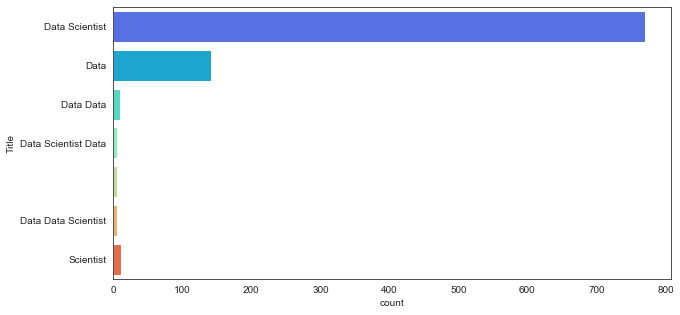

In [183]:
sns.countplot(y='Title',data=data_scientist,palette='rainbow')

In [194]:
data_scientist_trends.loc[1031]

Primary_Key                                c81d6ecf0d5e690f
Title          Operations Research Analyst (Data Scientist)
Company                           US Department of the Army
Location                                   Fort Belvoir, VA
Salary                           $121,316 - $157,709 a year
Ratings                                                 4.3
Remote_work                           Remote work available
Date_posted                                      3 days ago
City                                           Fort Belvoir
State                                                    VA
Name: 1031, dtype: object